# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [135]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [136]:
IMG_RESIZE = 28*28

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

#Flatten the training features

x_train = x_train.reshape((60000,IMG_RESIZE))
x_test = x_test.reshape((10000,IMG_RESIZE))

In [137]:
print('Training shape: ',x_train.shape,y_train.shape)
print('Testing shape: ',x_test.shape,y_test.shape)

Training shape:  (60000, 784) (60000,)
Testing shape:  (10000, 784) (10000,)


In [138]:
print(y_train.min(),y_train.max())

0 9


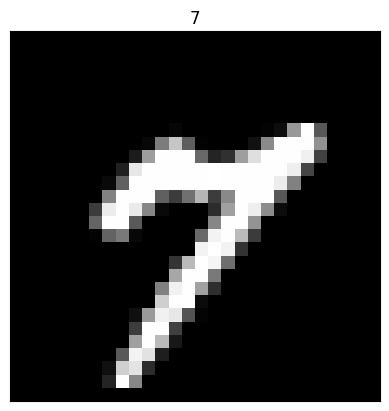

In [139]:
random_choice = np.random.randint(0,x_train.shape[0])
plt.imshow(x_train[random_choice].reshape((28,28)),cmap='gray')
plt.title(y_train[random_choice])
plt.xticks([])
plt.yticks([])
plt.show()

In [140]:
#Changing the labels to one hot enconding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [141]:
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [142]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Task 3: Adding Noise
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [143]:
x_train_noisy = x_train + np.random.rand(60000,IMG_RESIZE)*0.9
x_test_noisy = x_test + np.random.rand(10000,IMG_RESIZE)*0.9

In [144]:
def show_data(x,y):
    plt.figure(figsize=(20,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i].reshape(28,28),cmap='gray')
        plt.title(np.argmax(y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

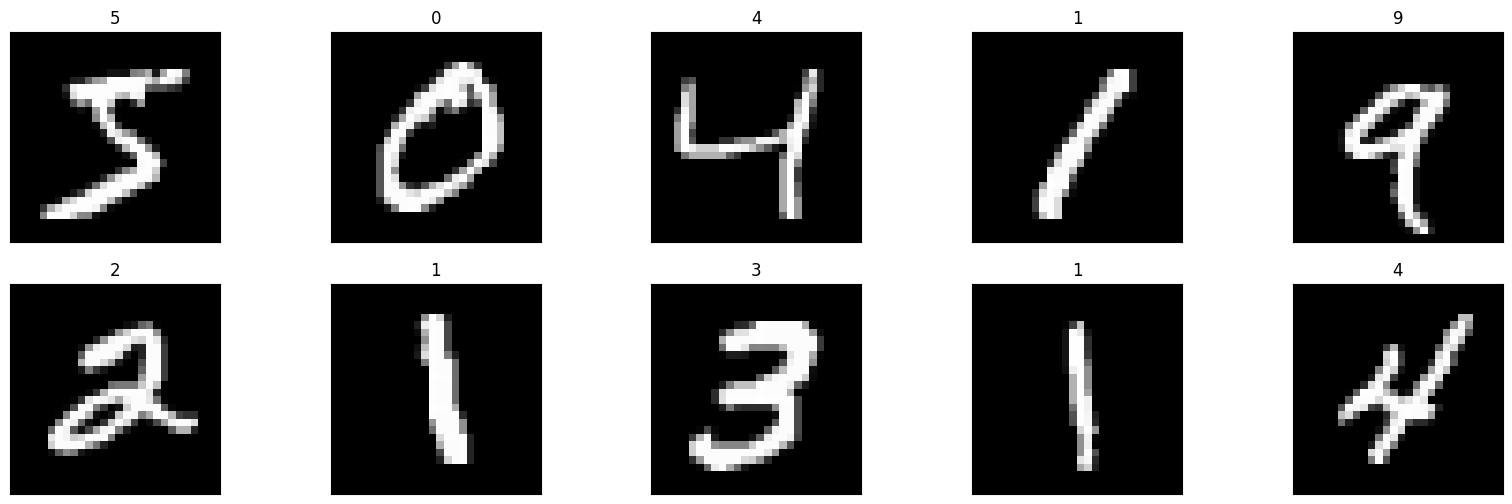

In [145]:
show_data(x_train,y_train)

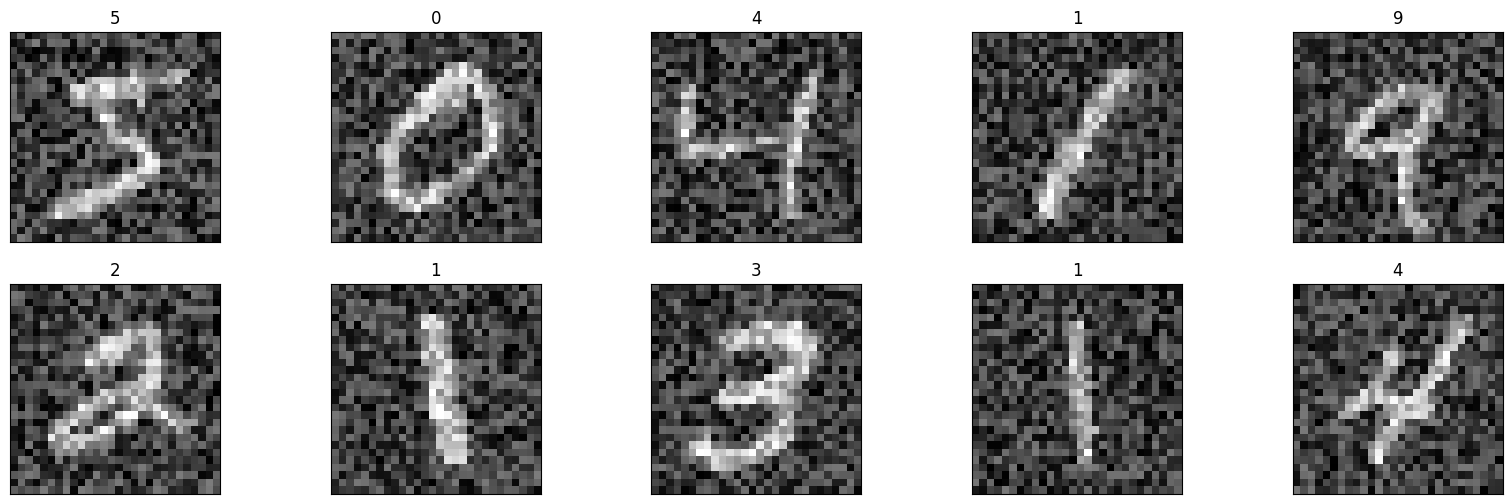

In [146]:
show_data(x_train_noisy,y_train)

## Task 4: Building and Training a Classifier
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [147]:
model = Sequential([Dense(256, activation='relu',input_shape=(IMG_RESIZE,)),
                  Dense(256, activation='relu'),
                  Dense(10, activation='softmax')])

In [148]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [149]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(x_train_noisy,y_train,batch_size=512, epochs=3)

2023-09-18 21:02:08.105666: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
118/118 [==============================] - 4s 15ms/step - loss: 0.6745 - accuracy: 0.7931
Epoch 2/3
118/118 [==============================] - 2s 15ms/step - loss: 0.3680 - accuracy: 0.8903
Epoch 3/3
118/118 [==============================] - 2s 17ms/step - loss: 0.3095 - accuracy: 0.9073


In [151]:
loss,acc = model.evaluate(x_test,y_test)
print('Accuracy: ',acc)
print('Loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.9244
Accuracy:  0.9243999719619751
Loss:  0.35712939500808716


## Task 5: Building the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [154]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image,decoded)
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                   metrics=['accuracy'])

## Task 6: Training the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [ ]:
autoencoder.fit(x_train_noisy,x_train,epochs=100,batch_size=512,validation_split=0.2,verbose=False, 
                callback=[
                    EarlyStopping(patience=5,monitor='val_loss'),
                    LambdaCallback(on_epoch_end=lambda e,1: print('{:.3f}'.format(1['val_loss']), end=' _ '))
                ])
print(' _ ')
print('Training is complete')

## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

## Task 8: Composite Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___